In [1]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import plotly.express as px

In [31]:
ticker = "AMZN"
stock_prices = yf.download(ticker,start="2020-01-01")
stock_prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000


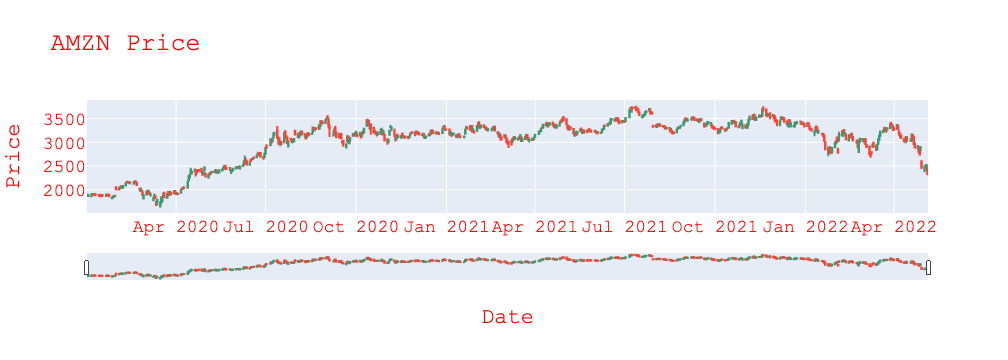

In [33]:
fig = go.Figure(data=[go.Candlestick(x=stock_prices.index,
                open=stock_prices.Open,
                high=stock_prices.High,
                low=stock_prices.Low,
                close=stock_prices['Adj Close'])]
               )
fig.update_layout(
    title=f"{ticker} Price",
    xaxis_title="Date",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Red"
    )
)

fig.show()

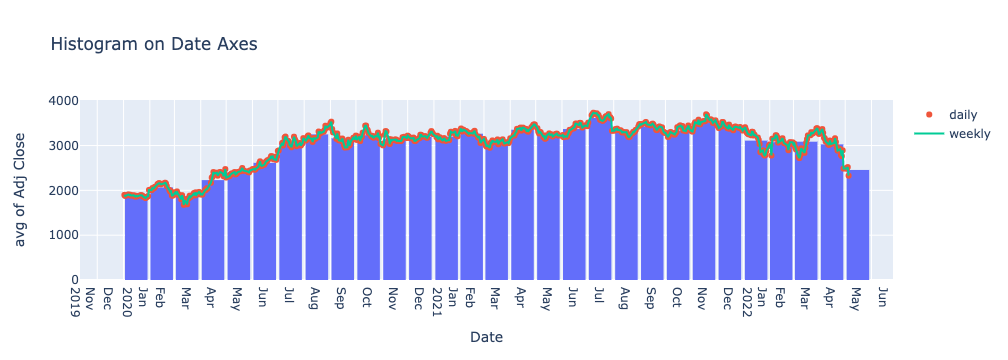

In [48]:
fig = px.histogram(stock_prices, x=stock_prices.index, y="Adj Close", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=stock_prices.index, y=stock_prices["Adj Close"], name="daily"))
fig.add_trace(go.Scatter(mode="lines", x=stock_prices.index, y=stock_prices["Adj Close"], name="weekly"))
fig.show()

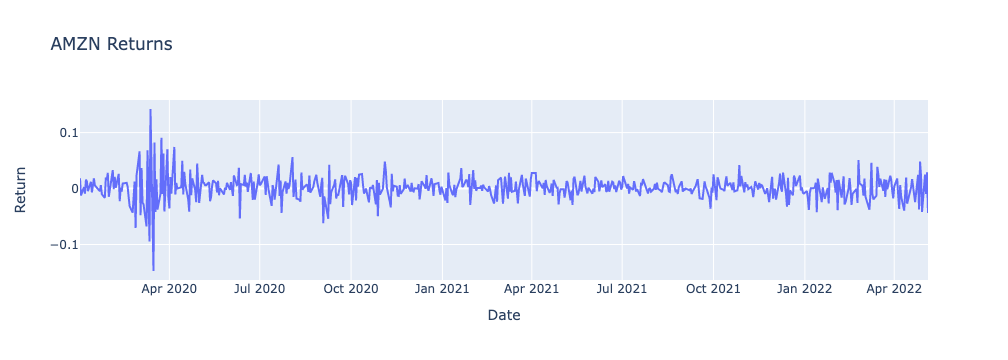

In [45]:
stock_prices['Return'] = StockPrices['Adj Close'].pct_change()
fig = px.line(stock_prices, x=stock_prices.index, y='Return', title=f'{ticker} Returns')
fig.show()

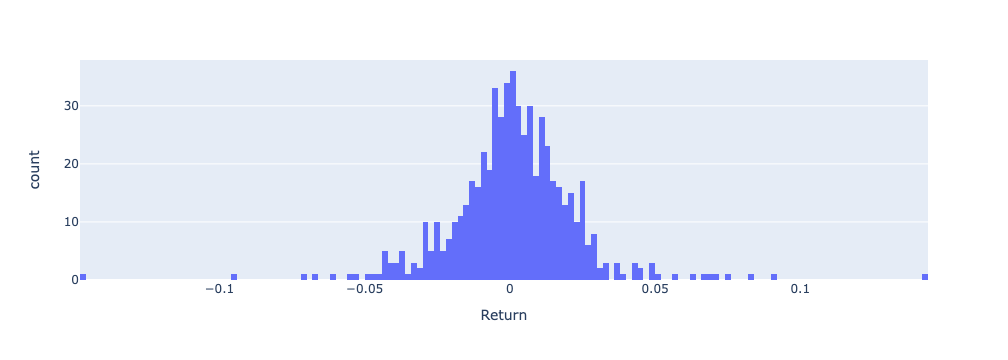

In [62]:
fig = px.histogram(stock_prices, x="Return", nbins=200)
fig.show()